In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
num_house = 300
np.random.seed(42)
house_size = np.random.randint(low=1000,high=3500,size=num_house)

np.random.seed(42)
house_price = house_size*100.0+np.random.randint(low=20000,high=70000,size=num_house)

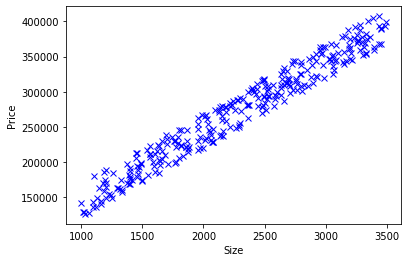

In [3]:
plt.plot(house_size,house_price,"bx")
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

In [4]:
def normalize(array):
    return (array-array.mean())/array.std()

In [5]:
num_train_samples = math.floor(num_house*.07)

In [6]:
train_house_size = np.array(house_size[:num_train_samples])
train_house_price = np.array(house_price[:num_train_samples])

test_house_size = np.array(house_size[num_train_samples:])
test_house_price = np.array(house_price[num_train_samples:])

In [7]:
train_house_size_normalize = normalize(train_house_size)
train_house_price_normalize = normalize(train_house_price)

test_house_size_normalize = normalize(test_house_size)
test_house_price_normalize = normalize(test_house_price)

In [8]:
tf_house_size = tf.placeholder("float",name="house_size")
tf_price = tf.placeholder("float",name="price")

In [9]:
tf_size_factor = tf.Variable(np.random.randn(),name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(),name="price_offset")

In [10]:
tf_price_pred = tf.add(tf.multiply(tf_size_factor,tf_house_size),tf_price_offset)

In [11]:
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price,2))/(2*num_train_samples)

In [12]:
learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

In [13]:
init = tf.global_variables_initializer()

Iteration #0 cost=2.1060214042663574 size_factor=-0.7979913949966431 price_offset=-0.9895803928375244
Iteration #1 cost=1.726804256439209 size_factor=-0.6285759806632996 price_offset=-0.8951810002326965
Iteration #2 cost=1.4163001775741577 size_factor=-0.47541114687919617 price_offset=-0.8097913861274719
Iteration #3 cost=1.162018060684204 size_factor=-0.3369382917881012 price_offset=-0.7325517535209656
Iteration #4 cost=0.9537420272827148 size_factor=-0.21174819767475128 price_offset=-0.6626841425895691
Iteration #5 cost=0.7831153869628906 size_factor=-0.09856661409139633 price_offset=-0.599484920501709
Iteration #6 cost=0.6433030366897583 size_factor=0.0037582938093692064 price_offset=-0.5423177480697632
Iteration #7 cost=0.5287133455276489 size_factor=0.09626792371273041 price_offset=-0.4906066954135895
Iteration #8 cost=0.4347720146179199 size_factor=0.1799037605524063 price_offset=-0.4438311755657196
Iteration #9 cost=0.3577366769313812 size_factor=0.25551703572273254 price_offset

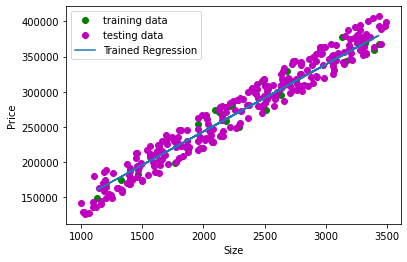

In [14]:
with tf.Session() as sess:
    sess.run(init)
    num_train_iter = 50
    for iteration in range(num_train_iter):
        for (x,y) in zip(train_house_size_normalize,train_house_price_normalize):
            sess.run(optimizer,feed_dict={tf_house_size:x,tf_price:y})
        c = sess.run(tf_cost,feed_dict={tf_house_size:train_house_price_normalize,tf_price:train_house_price_normalize})
        print(f"Iteration #{iteration} cost={c} size_factor={sess.run(tf_size_factor)} price_offset={sess.run(tf_price_offset)}")
    
    print("Finished")
    training_cost = sess.run(tf_cost,feed_dict={tf_house_size:train_house_price_normalize,tf_price:train_house_price_normalize})
    print(f"Training cost = {training_cost} size_factor={sess.run(tf_size_factor)} price_offset={sess.run(tf_price_offset)}")
    
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()
    
    train_price_mean = train_house_price.mean()
    train_price_std = train_house_price.std()
    
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size")
    plt.plot(train_house_size,train_house_price,"go",label="training data")
    plt.plot(test_house_size,test_house_price,"mo",label="testing data")
    plt.plot(train_house_size_normalize*train_house_size_std+train_house_size_mean,
             (sess.run(tf_size_factor)*train_house_size_normalize+sess.run(tf_price_offset))*train_price_std+train_price_mean,
             label="Trained Regression")
    plt.legend()
    plt.show()